# **Reto**

In [3]:
# Importamos librer√≠as de manejo num√©rico y procesamiento de datos.
import numpy as np
import pandas as pd

# Importamos scikit-learn, nuestra librer√≠a base para utilizar algoritmos de machine learning.
import sklearn

#Importamos los datasets de scikit-learn
from sklearn import datasets

# Importamos librer√≠as de scikit-learn para manejo de regresi√≥n lineal/log√≠stica.
from sklearn import linear_model

# Importamos librer√≠as de scikit-learn para uso de clasificaci√≥n de bosque aleatorio.
from sklearn.ensemble import RandomForestClassifier

# Importamos librer√≠as de scikit-learn para clusterizaci√≥n con k-means
from sklearn.cluster import KMeans

# Importamos librer√≠as para manejo del rendimiento (performance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Importamos librer√≠as para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el tama√±o del graficado (opcional).
plt.rcParams['font.size']=15

In [4]:
# Carga del Iris dataset.
iris = datasets.load_iris()

# Imprimimos los datos.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# Creamos el DataFrame con los feature names.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])

# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target], axis=1)

# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

# Imprimimos los primeros registros del nuevo DataFrame.
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
91                 6.1               3.0                4.6               1.4   
63                 6.1               2.9                4.7               1.4   
103                6.3               2.9                5.6               1.8   
6                  4.6               3.4                1.4               0.3   
59                 5.2               2.7                3.9               1.4   

     species  
91         1  
63         1  
103        2  
6          0  
59         1

## **1. Crear el DataFrame con los feature names**

- ``iris.data`` contiene las caracter√≠sticas num√©ricas de las flores (como el largo y ancho de los p√©talos y s√©palos).

- ``iris.feature_names`` son los nombres de las columnas, que describen cada caracter√≠stica.

- ``pd.DataFrame(...) ``convierte estos datos en un DataFrame de pandas, lo que facilita su manipulaci√≥n y an√°lisis.

Ejemplo de salida ``(data.head())``:

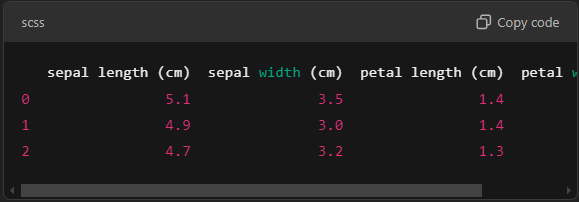

## **2. Crear el DataFrame con los targets**

``target = pd.DataFrame(data=iris.target, columns=['species'])``

- ``iris.target`` contiene los valores de las especies (0, 1 o 2, que representan las diferentes especies de Iris).

- Se convierte en un DataFrame de pandas con una sola columna llamada ``'species'``.

Ejemplo de salida ``(target.head())``:

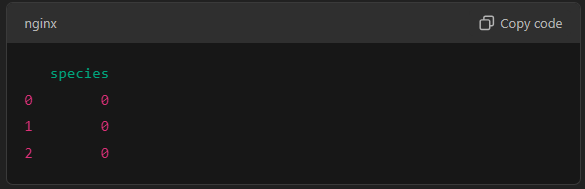

## **3. Unir los DataFrames con concat**

``data = pd.concat([data, target], axis=1)``
- ``pd.concat([...], axis=1)`` concatena los DataFrames por columnas.

- Ahora ``data`` tiene tanto las caracter√≠sticas como la columna ``'species'``.

Ejemplo ``(data.head())``:

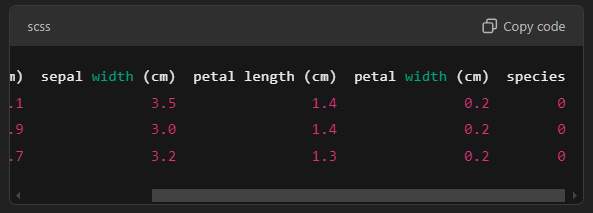

## **4. Mezclar en orden aleatorio**

``data = data.sample(frac=1, random_state=1234)``

- ``sample(frac=1)`` toma el 100% de las filas pero en orden aleatorio.

- ``random_state=1234`` asegura que los resultados sean reproducibles cada vez que se ejecute el c√≥digo.

- `data.head()` Muestra las primeras 5 filas del nuevo DataFrame mezclado

## **En resumen:**
1. Se crea un DataFrame con las caracter√≠sticas ``(data)``.

2. Se crea otro DataFrame con las especies ``(target)``.

3. Se combinan ambos DataFrames ``(data = pd.concat(...))``.

4. Se mezcla el DataFrame aleatoriamente ``(sample(frac=1))``.

5. Se muestran los primeros registros ``(data.head())``.

In [6]:
# Fracci√≥n de entrenamiento 0.8.
Ntrain = int(data.shape[0] * 0.8)

# Datos de entrenamiento.
train = data.iloc[:Ntrain, :]

# Datos de prueba.
test = data.iloc[Ntrain:, :]

## **1. Definir el tama√±o del conjunto de entrenamiento**

``Ntrain = int(data.shape[0] * 0.8)``

- ``data.shape[0]`` obtiene el n√∫mero total de filas en ``data`` (es decir, la cantidad de muestras en el dataset).

- Se multiplica por ``0.8`` para obtener el 80% de los datos para entrenamiento.

- ``int(...)`` convierte el resultado en un n√∫mero entero, ya que el √≠ndice de filas debe ser un valor entero.

üîπ Ejemplo:     
Si ``data.shape[0] = 150`` (porque el dataset de Iris tiene 150 muestras), entonces:

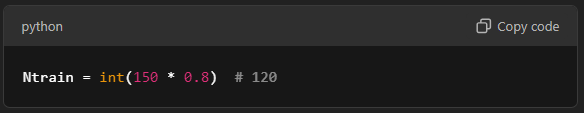

Esto significa que **las primeras 120 filas** se usar√°n para entrenamiento y las **30 restantes para prueba**.

## **2. Extraer datos de entrenamiento**

``train = data.iloc[:Ntrain, :]``
- ``iloc[:Ntrain, :]`` selecciona las primeras ``Ntrain`` filas de ``data``.

- ``:`` en la segunda posici√≥n significa "tomar todas las columnas".

üîπ Ejemplo:
Si ``Ntrain = 120``, entonces ``train`` contendr√° las filas **0 a 119** del DataFrame.

## **3. Extraer datos de prueba**

``test = data.iloc[Ntrain:, :]``
- ``iloc[Ntrain:, :]`` selecciona desde ``Ntrain`` hasta el final del DataFrame.

- Esto toma **el 20% restante** de los datos.

üîπ Ejemplo:    
Si ``Ntrain = 120``, entonces ``test`` contendr√° **las filas 120 a 149** del DataFrame.

## **üîπ Resumen del c√≥digo:**
1. Se calcula cu√°ntas filas (80%) se usar√°n para entrenamiento.

2. Se dividen los datos en ``train`` (las primeras ``Ntrain`` filas) y ``test`` (el resto).

3. ``train`` y ``test`` ahora contienen conjuntos separados para entrenar y evaluar un modelo.

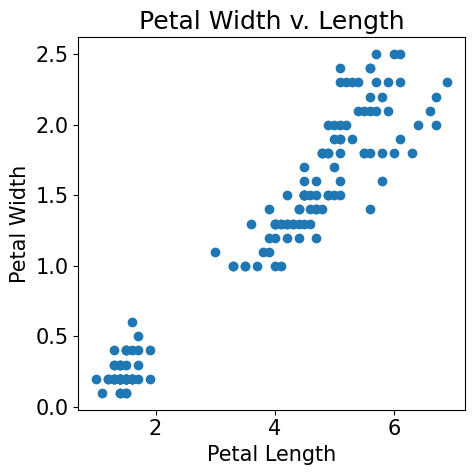

In [7]:
# Definimos variables para acceder de forma m√°s simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Creamos la gr√°fica comparanco Petal lenght (eje x) contra Petal width (eje y)
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Width v. Length")
f.tight_layout()

## **1. Definir variables para acceder a columnas espec√≠ficas**

``plength = data["petal length (cm)"]``     
``pwidth = data["petal width (cm)"]``

- Se extraen dos columnas del DataFrame ``data``:

  - ``plength`` almacena los valores de la columna **"petal length (cm)"**.

  - ``pwidth`` almacena los valores de la columna **"petal width (cm)"**.

- Esto facilita su uso en la gr√°fica, evitando escribir ``data["petal length (cm)"]`` cada vez.

## **2. Crear la figura y los ejes para la gr√°fica**

``f = plt.figure(figsize=(5,5))``     
``ax = f.add_subplot(1,1,1)``
- ``plt.figure(figsize=(5,5))`` crea una nueva figura de 5x5 pulgadas.

- ``add_subplot(1,1,1)`` agrega un √∫nico gr√°fico (1 fila, 1 columna, primer gr√°fico).

**üìå Ejemplo visual** de c√≥mo dividir gr√°ficos con a``dd_subplot(rows, cols, index)``:

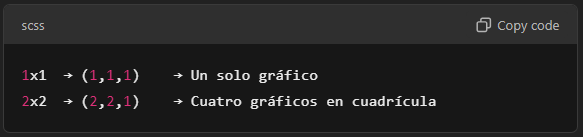

Aqu√≠ solo hay uno, as√≠ que no es necesario dividir.

## **3. Dibujar el gr√°fico de dispersi√≥n**

``ax.scatter(plength, pwidth)``
- ``scatter(x, y)`` crea un **diagrama de dispersi√≥n**.

- En este caso, ``plength`` (eje X) se grafica contra ``pwidth`` (eje Y).

- Cada punto representa una flor en funci√≥n del largo y ancho de su p√©talo.

## **4. Etiquetas y t√≠tulo**

``ax.set_xlabel("Petal Length")``    
``ax.set_ylabel("Petal Width")``    
``ax.set_title("Petal Width v. Length")``     
- ``set_xlabel("Petal Length")`` etiqueta el eje X.

- ``set_ylabel("Petal Width")`` etiqueta el eje Y.

- ``set_title("Petal Width v. Length")`` le da un t√≠tulo al gr√°fico.

## **5. Ajustar el dise√±o del gr√°fico**

``f.tight_layout()``
- ``tight_layout()`` **ajusta autom√°ticamente** los m√°rgenes para evitar que las etiquetas o t√≠tulos se sobrepongan.

## **üîπ Resumen del c√≥digo:**
‚úÖ Extrae las columnas Petal Length y Petal Width.   
‚úÖ Crea una figura y un gr√°fico de dispersi√≥n.     
‚úÖ A√±ade etiquetas y t√≠tulo.    
‚úÖ Ajusta la distribuci√≥n del gr√°fico.   

In [8]:
# Importar un objeto de regresi√≥n lineal de sklearn.
model_1 = linear_model.LinearRegression()

# Ajustar el modelo a tus datos.
model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])

# Imprimir los coeficientes.
print("Coef\n", model_1.coef_)

# Imprimir el sesgo o bias.
print("\n\nBias\n", model_1.intercept_)

Coef
 [0.41490802]


Bias
 -0.357589314248546


## **1Ô∏è‚É£ Importar el modelo de regresi√≥n lineal**

``model_1 = linear_model.LinearRegression()``
- Se **crea un objeto** de regresi√≥n lineal usando ``LinearRegression() de sklearn.linear_model``.

- Este modelo buscar√° **ajustar una l√≠nea recta** a los datos para hacer predicciones.

## **2Ô∏è‚É£ Entrenar el modelo con los datos de entrenamiento**

``model_1.fit(pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3])``
- ``train.iloc[:, 2]``: Toma la **tercera columna** de ``train`` (√≠ndice ``2``).

- ``train.iloc[:, 3]``: Toma la **cuarta columna** de ``train`` (√≠ndice ``3``).

- ``pd.DataFrame(...)``: Convierte ``train.iloc[:, 2]`` en un DataFrame, porque ``sklearn`` requiere que las **features** sean en formato de 2D (matriz de caracter√≠sticas).

**üîπ Ejemplo:**     
Si ``train.iloc[:, 2]`` representa **"Petal Length"** y ``train.iloc[:, 3]`` representa **"Petal Width"**, entonces estamos ajustando un modelo que predice el **ancho del p√©talo** a partir de **su largo**.

## **3Ô∏è‚É£ Imprimir los coeficientes del modelo**

``print("Coef\n", model_1.coef_)``
- ``model_1.coef_`` devuelve los **coeficientes (pendientes)** del modelo.

- En una regresi√≥n lineal de la forma:

$$Y = mx+b$$

``coef_`` es el valor de ``m`` **(pendiente de la recta)**.

**üîπ Ejemplo de salida:**

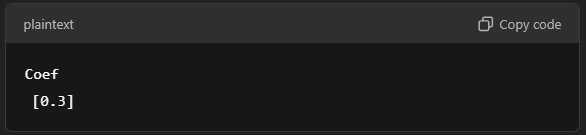

Esto significa que por **cada unidad que aumenta "Petal Length"**, el **"Petal Width"** aumenta en ``0.3``.



## **4Ô∏è‚É£ Imprimir el sesgo (bias/intercepto)**

``print("\n\nBias\n", model_1.intercept_)``
- ``model_1.intercept_`` es el **t√©rmino independiente** ``b`` en la ecuaci√≥n de la recta:

$$y=mx+b$$

- Representa **d√≥nde la l√≠nea cruza el eje Y** cuando ``x = 0``.

**üîπ Ejemplo de salida:**

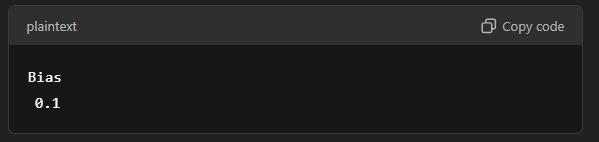

Esto significa que si ``Petal Length = 0``, entonces el **Petal Width** predicho ser√≠a ``0.1``.

## **üîπ Resumen del c√≥digo:**
‚úÖ Crea un modelo de regresi√≥n lineal.     
‚úÖ Entrena el modelo con **Petal Length** como entrada y **Petal Width** como salida.      
‚úÖ Muestra el coeficiente (``m``) y el bias (``b``).    

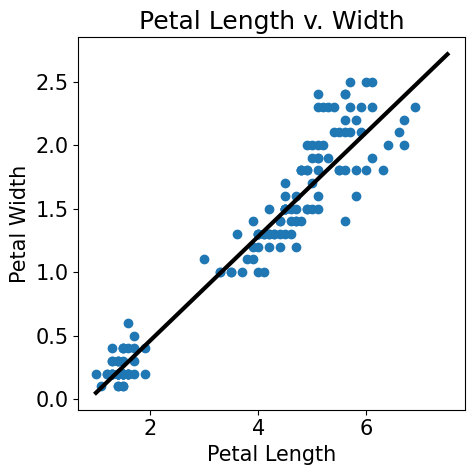

In [9]:
# Definimos variables para acceder de forma m√°s simple a las columnas de nuestros features.
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Definimos un arreglo desde el valor m√≠mimo del petal length hasta el m√°ximo del petal lenght + 1, en pasos de 0.5.
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

# Ecuaci√≥n de nuestra regresi√≥n lineal.
yvals = 0.41*xvals - 0.36

# Gr√°ficamos nuestra recta con los datos y nuestra ecuaci√≥n.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=3)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

## **1Ô∏è‚É£ Extraer columnas del DataFrame**

``plength = data["petal length (cm)"]``    
``pwidth = data["petal width (cm)"]``    
- Se extraen las columnas **"Petal Length"** y **"Petal Width"** del DataFrame ``data``, lo que simplifica su uso en la gr√°fica.

## **2Ô∏è‚É£ Generar un rango de valores para la predicci√≥n**

``xvals = np.arange(plength.min(), plength.max()+1, 0.5)``
- ``plength.min()`` ‚Üí Valor m√≠nimo de **"Petal Length"**.

- ``plength.max()+1`` ‚Üí Valor m√°ximo + 1 (para extender un poco el rango).

- ``0.5`` ‚Üí Incremento entre valores (se generan puntos cada 0.5 unidades).

- **Objetivo**: Crear valores de entrada ``x`` para graficar la l√≠nea de regresi√≥n.

üîπ **Ejemplo de salida** (``xvals``) si el m√≠nimo es 1 y el m√°ximo es 6:



## **3Ô∏è‚É£ Definir la ecuaci√≥n de la regresi√≥n lineal**

``yvals = 0.41*xvals - 0.36``
- Se usa la ecuaci√≥n de la recta:

$$ y=mx+b$$
donde:

- ``m = 0.41`` (pendiente de la recta).

- ``b = -0.36`` (intercepto o bias).

- Esto genera valores ``yvals`` correspondientes a cada ``xvals``.

üîπ Ejemplo de c√°lculo para ``x = 1.5``:




## **4Ô∏è‚É£ Graficar la regresi√≥n junto con los datos originales**
```python
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
# Gr√°fico de dispersi√≥n
ax.scatter(plength, pwidth)
# L√≠nea de regresi√≥n en negro ('k'), grosor 3  
ax.plot(xvals, yvals, 'k', linewidth=3)  
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()
```

- ``ax.scatter(plength, pwidth)``: Grafica los puntos de datos originales.

- ``ax.plot(xvals, yvals, 'k', linewidth=3)``:

  - ``xvals`` ‚Üí Valores en **X**.

  - ``yvals`` ‚Üí Valores en **Y** (predichos con la regresi√≥n).

  - ``'k'`` ‚Üí Color negro.

  - ``linewidth=3`` ‚Üí Grosor de la l√≠nea.

#### **üîπ Visualizaci√≥n esperada:** 

**üìå Puntos dispersos** ‚Üí Representan los datos originales.     
**üìå L√≠nea recta negra** ‚Üí Muestra la predicci√≥n de la regresi√≥n.

## **üîπ Resumen del c√≥digo:**
‚úÖ Extrae los datos de **"Petal Length"** y **"Petal Width"**.    
‚úÖ Crea valores ``xvals`` en un rango para la predicci√≥n.     
‚úÖ Define ``yvals`` con la ecuaci√≥n de la regresi√≥n.       
‚úÖ Grafica los puntos originales y la l√≠nea de regresi√≥n. 

## Podemos mejorar el c√≥digo

In [11]:
# Extraemos las columnas que usaremos para la regresi√≥n
plength = data["petal length (cm)"]
pwidth = data["petal width (cm)"]

# Entrenamos el modelo de regresi√≥n lineal con los datos de entrenamiento
model_1 = linear_model.LinearRegression()
model_1.fit(train[["petal length (cm)"]], train["petal width (cm)"])

# Extraemos la pendiente (coeficiente) y el intercepto (bias)
m = model_1.coef_[0]      # Pendiente de la recta
b = model_1.intercept_    # Intercepto

# Generamos los valores de x para la recta
xvals = np.arange(plength.min(), plength.max() + 1, 0.5)

# Calculamos yvals usando los coeficientes del modelo
yvals = m * xvals + b

# Graficamos los datos y la regresi√≥n
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth, label="Datos originales")  # Puntos originales
ax.plot(xvals, yvals, 'r', linewidth=3, label="Regresi√≥n lineal")  # L√≠nea de regresi√≥n en rojo
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
ax.legend()  # Agrega una leyenda
f.tight_layout()


## **üîπ ¬øQu√© mejoras tiene este c√≥digo?**
‚úÖ No usa coeficientes fijos ‚Üí Obtiene m y b del modelo LinearRegression.      
‚úÖ Automatiza la ecuaci√≥n ‚Üí Si los datos cambian, la l√≠nea de regresi√≥n se ajusta sola.      
‚úÖ Gr√°fica m√°s clara ‚Üí La l√≠nea de regresi√≥n es roja ('r') y tiene una leyenda.     

In [10]:
# Predicci√≥n con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))

MSE: 0.04
R2: 0.94


## **üîπ Paso 1: Hacer predicciones con el modelo**
``
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))
``

Aqu√≠ estamos usando el modelo de regresi√≥n lineal (``model_1``) para hacer predicciones sobre los datos de prueba.

**üìå Explicaci√≥n detallada:**

- ``test.iloc[:, 2]`` ‚Üí Selecciona la tercera columna de ``test``, que corresponde a **"petal length (cm)"**.

- ``pd.DataFrame(...)`` ‚Üí Convierte la columna en un ``DataFrame``, ya que ``predict()`` espera este formato.

- ``model_1.predict(...)`` ‚Üí Usa el modelo entrenado para predecir los valores de **"petal width (cm)"** a partir de **"petal length (cm)"**.

- ``ypredict`` ‚Üí Guarda las predicciones generadas.


## **üîπ Paso 2: Calcular el Error Cuadr√°tico Medio (MSE)**
```python
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))
```
      
Aqu√≠ estamos calculando el **Error Cuadr√°tico Medio (MSE**), que mide qu√© tan lejos est√°n nuestras predicciones de los valores reales.

**üìå Explicaci√≥n detallada:**

- ``test.iloc[:, 3]`` ‚Üí Obtiene la cuarta columna de ``test``, que es el **valor real de "petal width (cm)"**.

- ``mean_squared_error(...)`` ‚Üí Calcula el **MSE**, que es la media de los cuadrados de las diferencias entre los valores reales y predichos.

- ``%.2f`` ‚Üí Formatea el resultado para mostrar solo 2 decimales.

**üîé ¬øQu√© significa el MSE?**

- Si el MSE es **cercano a 0**, significa que el modelo predice muy bien.

- Si el MSE es alto, el modelo tiene mucho error y podr√≠a mejorarse.



## **üîπ Paso 3: Calcular el Coeficiente de Determinaci√≥n (R¬≤)**
```python
print('R2: %.2f'
      % r2_score(pd.DataFrame(test.iloc[:, 3]), ypredict))
```    
Aqu√≠ calculamos **el coeficiente de determinaci√≥n (R¬≤)**, que nos dice qu√© tan bien se ajusta la regresi√≥n a los datos.

**üìå Explicaci√≥n detallada:**

- ``r2_score(...)`` ‚Üí Calcula el **R¬≤**, que mide la proporci√≥n de la variabilidad explicada por el modelo.

- ``%.2f`` ‚Üí Formatea el resultado para mostrar solo 2 decimales.

**üîé ¬øQu√© significa el R¬≤?**

- **R¬≤ ‚âà 1** ‚Üí El modelo es **excelente**, explica casi toda la variabilidad.

- **R¬≤ ‚âà 0** ‚Üí El modelo **no explica nada**, las predicciones son aleatorias.

- **R¬≤ negativo** ‚Üí El modelo es **peor que adivinar el promedio.** üò¨

## **‚ú® Resumen final**
**üìå ¬øQu√© hace este c√≥digo?**     
1Ô∏è‚É£ Predice los valores de "petal width (cm)" en los datos de prueba.    
2Ô∏è‚É£ Calcula el MSE ‚Üí Cu√°nto error tiene el modelo.     
3Ô∏è‚É£ Calcula el R¬≤ ‚Üí Qu√© tan bien explica el modelo los datos.    

**üìå ¬øC√≥mo interpretar los resultados?**

- **Si MSE es bajo y R¬≤ es cercano a 1** ‚Üí El modelo es bueno. ‚úÖ

- **Si MSE es alto y R¬≤ es bajo** ‚Üí El modelo tiene problemas. ‚ùå

In [12]:
# Preparamos los datos de entrenamiento y prueba en x y y.
# La √∫ltima columna es la etiqueta de la especie..
xtrain = train.iloc[:, :-1] # input, training
ytrain = train.iloc[:, -1] # output, training
xtest = test.iloc[:, :-1] # input, test
ytest = test.iloc[:, -1] # output, test

# Configuramos la regresi√≥n log√≠stica con el m√©todo de regresi√≥n log√≠stica de linear_model.
model_2 = linear_model.LogisticRegression()

# Ajustamos el modelo con los datos de entrenamiento.
model_2.fit(xtrain, ytrain)

LogisticRegression()

Este bloque de c√≥digo est√° preparando los datos para entrenar un modelo de **Regresi√≥n Log√≠stica** con ``sklearn``. Veamos qu√© hace cada parte:

## **üîπ Paso 1: Separar las variables de entrada (X) y salida (Y)**
```python
xtrain = train.iloc[:, :-1]  # input, training
ytrain = train.iloc[:, -1]   # output, training
xtest = test.iloc[:, :-1]    # input, test
ytest = test.iloc[:, -1]     # output, test
```    
**üìå Explicaci√≥n:**

- ``train.iloc[:, :-1]`` ‚Üí Toma **todas las columnas excepto la √∫ltima** (caracter√≠sticas de la flor).

- ``train.iloc[:, -1]`` ‚Üí Toma **solo la √∫ltima columna**, que es **la especie de la flor** (etiqueta o clase).

- Lo mismo se hace con ``test`` para obtener ``xtest`` y ``ytest``.

**üîé Ejemplo de c√≥mo quedan los datos:**



**Aqu√≠:**

- ``xtrain`` tiene **todas las columnas excepto "species".**

- ``ytrain`` tiene **solo la columna "species".**

## **üîπ Paso 2: Crear el modelo de Regresi√≥n Log√≠stica**
``model_2 = linear_model.LogisticRegression()``

**üìå Explicaci√≥n:**

- ``linear_model.LogisticRegression()`` ‚Üí Crea un modelo de **clasificaci√≥n** basado en Regresi√≥n Log√≠stica.

**üîé ¬øPor qu√© usamos regresi√≥n log√≠stica?**

- Se usa cuando la variable objetivo (``y``) es **categ√≥rica** (en este caso, el tipo de flor).

- Permite clasificar observaciones en **diferentes clases** bas√°ndose en probabilidades.



## **üîπ Paso 3: Entrenar el modelo con los datos de entrenamiento**
``model_2.fit(xtrain, ytrain)``

**üìå Explicaci√≥n:**

- ``model_2.fit(xtrain, ytrain)`` ‚Üí Ajusta el modelo a los datos de entrenamiento.

- Encuentra los **coeficientes** y el ``sesgo`` para separar correctamente las especies de flores.

## **‚ú® Resumen**
**üìå ¬øQu√© hace este c√≥digo?**     
1Ô∏è‚É£ Separa las caracter√≠sticas (``X``) y la etiqueta (``Y``).     
2Ô∏è‚É£ Crea un modelo de **Regresi√≥n Log√≠stica**.     
3Ô∏è‚É£ **Entrena** el modelo con los datos de entrenamiento (``xtrain``, ``ytrain``).

**üìå ¬øQu√© podemos hacer despu√©s?**    
Ahora podr√≠amos **evaluar** qu√© tan bien clasifica el modelo con los datos de prueba (``xtest``, ``ytest``).

In [13]:
# Hacer predicciones con el conjunto de prueba.
ypred = model_2.predict(xtest)

# Probamos el accuracy del modelo generado
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


Este bloque de c√≥digo realiza la **predicci√≥n** y la **evaluaci√≥n** de un modelo de **Regresi√≥n Log√≠stica** que ya fue entrenado. Vamos a desglosarlo paso a paso:

## **üîπ Paso 1: Hacer predicciones con el conjunto de prueba**

``ypred = model_2.predict(xtest)``

**üìå Explicaci√≥n:**

- ``model_2.predict(xtest)`` ‚Üí Utiliza el modelo entrenado (``model_2``) para hacer **predicciones** sobre los datos de prueba (``xtest``).

- ``xtest`` contiene las **caracter√≠sticas de la flor** (como "petal length", "petal width", etc.), y el modelo devuelve una **predicci√≥n de las especies** de las flores (por ejemplo, "setosa", "versicolor", "virginica").

- ``ypred`` guarda las **predicciones** generadas por el modelo para cada instancia de ``xtest``.



## **üîπ Paso 2: Evaluar la precisi√≥n del modelo**

``print("Testing accuracy =", accuracy_score(ytest, ypred))``

**üìå Explicaci√≥n:**

- ``accuracy_score(ytest, ypred)`` ‚Üí Calcula la **precisi√≥n** del modelo, que es la fracci√≥n de **predicciones correctas**.

- ``ytest`` ‚Üí Los valores reales de las especies en el conjunto de prueba.

- ``ypred`` ‚Üí Las predicciones realizadas por el modelo.

- ``accuracy_score`` compara estos dos vectores y calcula el porcentaje de veces que el modelo acert√≥.

- ``print("Testing accuracy =", ...)`` ‚Üí Muestra el resultado en la consola, indicando qu√© tan bien el modelo logr√≥ predecir las especies en el conjunto de prueba.

**üîé ¬øQu√© es la precisi√≥n?**     

La precisi√≥n se calcula como:
$$\text{Precisi√≥n} = \frac{\text{Predicciones correctas}}{\text{Total de Predicciones}} √ó 100$$

## **‚ú® Resumen**
**üìå ¬øQu√© hace este c√≥digo?**

1Ô∏è‚É£ **Realiza predicciones** usando el modelo de Regresi√≥n Log√≠stica sobre el conjunto de prueba (``xtest``).  
2Ô∏è‚É£ **Eval√∫a la precisi√≥n** del modelo al comparar las predicciones (``ypred``) con los valores reales (``ytest``).     
3Ô∏è‚É£ Imprime el **porcentaje de precisi√≥n** en el conjunto de prueba.

**üìå ¬øQu√© podemos hacer despu√©s?**     
Si la precisi√≥n es alta, entonces el modelo funciona bien. Si no es tan alta, podr√≠amos probar otros modelos o mejorar la calidad de los datos.

La **precisi√≥n (accuracy)** est√° en un rango de valores entre **0 y 1**, o si se expresa en porcentaje, entre **0% y 100%**.

**üìå Interpretaci√≥n de la Precisi√≥n**
- **Cercano a 1 (o 100%)** ‚Üí El modelo es muy preciso y casi todas las predicciones son correctas.

- **Cercano a 0 (o 0%)** ‚Üí El modelo no tiene precisi√≥n y est√° fallando en la mayor√≠a de las predicciones.

- **50% (0.5)** ‚Üí Equivalente a predecir al azar (como lanzar una moneda).

- **70%-90%** ‚Üí Un modelo aceptable, dependiendo del problema.

- **95%-100%** ‚Üí Podr√≠a indicar un excelente modelo o posible sobreajuste (overfitting).

**üìå ¬øQu√© precisi√≥n es buena?**

Depende del problema:

- **Clasificaci√≥n simple** (ej. spam o no spam) ‚Üí Se espera **>80%**.

- **Problemas complejos** (ej. reconocimiento de im√°genes) ‚Üí A veces, **> 70%** ya es bueno.

- **Modelos biom√©dicos o financieros** ‚Üí Se busca **>90%**, pero tambi√©n se analiza **sensibilidad** y **especificidad**.

In [14]:
# Un ejemplo de la matriz de confusi√≥n con sklearn
#Importamos el m√©todo de matriz de confusi√≥n desde sklearn
from sklearn.metrics import confusion_matrix

#Aplicamos la matriz a nuestros valores de testing y los valores de predicci√≥n generados.
confusion_matrix(ytest, ypred)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]])

**üìå Explicaci√≥n del C√≥digo: Matriz de Confusi√≥n**    

Este bloque de c√≥digo genera una **matriz de confusi√≥n** para evaluar el rendimiento del modelo de clasificaci√≥n.

# **üîπ Paso a Paso**
## **1Ô∏è‚É£ Importaci√≥n de la funci√≥n de matriz de confusi√≥n**

``from sklearn.metrics import confusion_matrix``

- ``confusion_matrix`` es una funci√≥n de ``sklearn.metrics`` que permite evaluar el desempe√±o de un modelo de clasificaci√≥n.

## **2Ô∏è‚É£ C√°lculo de la matriz de confusi√≥n**

``confusion_matrix(ytest, ypred)``    
- Se comparan las etiquetas reales (``ytest``) con las **predicciones** (``ypred``).

- Devuelve una matriz cuadrada donde:

    - **Filas**: Representan las clases reales.
  
    - **Columnas**: Representan las predicciones del modelo.
  
    - Cada celda indica cu√°ntos datos fueron correctamente o incorrectamente clasificados.

### **üìå ¬øC√≥mo interpretar la matriz de confusi√≥n?**
Para el dataset **Iris**, que tiene 3 clases (tres especies de flores), la matriz ser√° de **3x3**.

Ejemplo de salida:
```lua
[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
 ```

Donde:

- **Fila 1 (Setosa)** ‚Üí [19, 0, 0]

    - 19 setosas fueron clasificadas correctamente.

    - 0 fueron clasificadas como otra especie.

- **Fila 2 (Versicolor)** ‚Üí [0, 15, 1]

    - 15 versicolores fueron clasificadas correctamente.

    - 1 fue mal clasificada.

- **Fila 3 (Virginica)** ‚Üí [0, 0, 15]

    - 15 virginicas fueron clasificadas correctamente.

    - 0 fueron mal clasificadas.

**üìå Si la matriz tiene valores fuera de la diagonal principal, significa que el modelo ha cometido errores de clasificaci√≥n.**

## **üìå ¬øC√≥mo usar esta informaci√≥n?**
- **Si la matriz es diagonal** (sin valores fuera de la diagonal), el modelo tiene 100% de precisi√≥n.

- **Si hay errores**, podemos mejorar el modelo ajustando hiperpar√°metros o usando m√°s datos.

In [15]:
# Creamos el clasificador
clf = RandomForestClassifier(n_estimators=3)

# Entrenamos el modelo
clf.fit(xtrain, ytrain)

# Generamos predicci√≥n
y_pred=clf.predict(xtest)

# Probamos el modelo con accuracy
print("Testing accuracy =", accuracy_score(ytest, ypred))

Testing accuracy = 1.0


## **üìå Explicaci√≥n del C√≥digo: Random Forest Classifier üå≥üå≤**
Este c√≥digo implementa un **clasificador de bosques aleatorios** (``RandomForestClassifier``) para clasificar las especies de flores en el dataset **Iris**.

# **üîπ Paso a Paso**
## **1Ô∏è‚É£ Creaci√≥n del clasificador Random Forest**

``clf = RandomForestClassifier(n_estimators=3)``    
- Se crea un modelo de **Random Forest** con **3 √°rboles de decisi√≥n** (``n_estimators=3``).

- **¬øQu√© es Random Forest?**

  - Es un conjunto de m√∫ltiples **√°rboles de decisi√≥n**.

  - Cada √°rbol hace una predicci√≥n y el modelo toma la decisi√≥n final por **votaci√≥n mayoritaria**.



## **2Ô∏è‚É£ Entrenamiento del modelo**

``clf.fit(xtrain, ytrain)``     
- Ajusta el modelo con los **datos de entrenamiento** (``xtrain``, ``ytrain``).

- Aprende patrones en los datos para clasificar nuevas observaciones.



## **3Ô∏è‚É£ Predicci√≥n con datos de prueba**

``y_pred = clf.predict(xtest)``
- Utiliza el modelo entrenado para **predecir las especies** en los datos de prueba (``xtest``).

- ``y_pred`` almacena las etiquetas predichas para cada flor.



## **4Ô∏è‚É£ C√°lculo del Accuracy**

``print("Testing accuracy =", accuracy_score(ytest, ypred))``
- Compara las etiquetas reales (``ytest``) con las predicciones (``y_pred``).

- Devuelve el **porcentaje de aciertos** del modelo en el conjunto de prueba.

## **üìå Resumen del funcionamiento**
üîπ **Random Forest** genera varios √°rboles de decisi√≥n y toma la predicci√≥n m√°s frecuente.     
üîπ **Ventaja:** Reduce el sobreajuste en comparaci√≥n con un solo √°rbol de decisi√≥n.     
üîπ **Limitaci√≥n:** Con pocos √°rboles (``n_estimators=3``), la precisi√≥n puede ser menor.   

**üìå ¬øQuieres mejorar la precisi√≥n?**

- **Aumenta** ``n_estimators`` (ejemplo: ``n_estimators=100``).

- **Usa t√©cnicas de preprocesamiento** como normalizaci√≥n de datos.

In [17]:
# Inicializamos el modelo KMeans.
k2model = KMeans(n_clusters=2, random_state=42)

# Ajustar todos los puntos de datos EXCEPTO para la especie.
k2model.fit(data[["petal length (cm)", "petal width (cm)"]])

# Calculamos e imprimimos la inercia desde el modelo de Kmeans.
print("Inertia =", k2model.inertia_)

# C√°lculamos e imprimimos la posici√≥n de los cl√∫sters.
print("Centroids (x, y) =\n", k2model.cluster_centers_)

Inertia = 86.39021984551397
Centroids (x, y) =
 [[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]


Este bloque de c√≥digo aplica el algoritmo de **K-Means** para agrupar los datos del conjunto ``iris`` en **dos cl√∫sters** usando las caracter√≠sticas *petal length* y *petal width*.

# **Explicaci√≥n l√≠nea por l√≠nea:**
## **1Ô∏è‚É£ Inicializamos el modelo K-Means**

``k2model = KMeans(n_clusters=2, random_state=42)``
- ``n_clusters=2``: Define que queremos **2 grupos** o cl√∫sters.

- ``random_state=42``: Asegura que los resultados sean **reproducibles** en futuras ejecuciones.

## **2Ô∏è‚É£ Entrenamos el modelo con los datos**

``k2model.fit(data[["petal length (cm)", "petal width (cm)"]])``
- Se usa **solo** *petal length* y *petal width* para agrupar los datos (sin la especie).

- ``fit()`` detecta patrones y agrupa los puntos en **dos cl√∫sters**.

## **3Ô∏è‚É£ Calculamos la inercia**

``print("Inertia =", k2model.inertia_)``
- **Inercia**: Es la suma de las distancias cuadradas entre los puntos y sus respectivos centroides.

- **Menos inercia ‚Üí mejores cl√∫sters**, porque los puntos est√°n m√°s cerca de sus centroides.

## **4Ô∏è‚É£ Calculamos la posici√≥n de los centroides**

``print("Centroids (x, y) =\n", k2model.cluster_centers_)``
- ``cluster_centers_`` devuelve las **coordenadas** de los dos **centroides**.

- Estos representan el "punto medio" de cada cl√∫ster.

## **üìå Resumen**
Este c√≥digo **agrupa** las flores del dataset en **dos cl√∫sters** utilizando solo dos caracter√≠sticas (*petal length* y *petal width*), calcula la calidad del agrupamiento con la **inercia**, y muestra la posici√≥n de los **centroides**. üöÄ

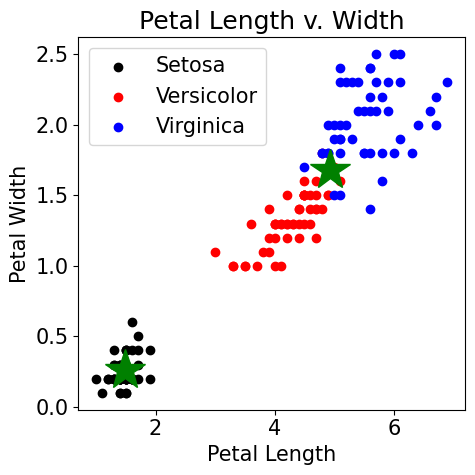

In [19]:
# Graficamos los datos con la l√≠nea para setosa.
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)

# Setosa
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')

ax.legend(["Setosa", "Versicolor", "Virginica"])

# Graficamos los centroides de los cl√∫sters (output en Petal Length x Petal Width)
ax.plot(k2model.cluster_centers_[:,0],
        k2model.cluster_centers_[:,1],
        "g*", markersize=30)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal Length v. Width")
f.tight_layout()

### **‚ú® Explicaci√≥n del c√≥digo: Visualizaci√≥n de especies y centroides de K-Means**
Este c√≥digo genera un **gr√°fico de dispersi√≥n** de las flores del dataset **Iris**, coloreando cada especie y mostrando los centroides de los cl√∫sters encontrados con **K-Means**.

# **üîπ Paso a paso del c√≥digo:**
## **1Ô∏è‚É£ Se crea la figura y los ejes**

``f = plt.figure(figsize=(5,5))  ``      
``ax = f.add_subplot(1,1,1)``

üîπ Se crea una figura de **5x5** y un eje de gr√°fico dentro de ella.

## **2Ô∏è‚É£ Se grafican las tres especies del dataset**
Cada especie se filtra y se grafica con un color diferente en base a la columna de etiquetas (``species``).

```python
# Setosa (color negro)
ax.scatter(data[data.iloc[:, -1]==0]["petal length (cm)"],
           data[data.iloc[:, -1]==0]["petal width (cm)"],
           c='k')

# Versicolor (color rojo)
ax.scatter(data[data.iloc[:, -1]==1]["petal length (cm)"],
           data[data.iloc[:, -1]==1]["petal width (cm)"],
           c='r')

# Virginica (color azul)
ax.scatter(data[data.iloc[:, -1]==2]["petal length (cm)"],
           data[data.iloc[:, -1]==2]["petal width (cm)"],
           c='b')
```

**üìå Explicaci√≥n:**

- Se usa ``data.iloc[:, -1]`` para acceder a la **√∫ltima columna** del DataFrame (que contiene la especie).

- Se comparan los valores con **0**, **1**, **2** para filtrar cada especie:

    - **0 ‚Üí Setosa** (``c='k'`` ‚Üí negro)

    - **1 ‚Üí Versicolor** (``c='r'`` ‚Üí rojo)

    - **2 ‚Üí Virginica** (``c='b'`` ‚Üí azul)

- Luego, se grafica cada especie con ``ax.scatter()``, utilizando sus valores de **Petal Length (x)** y **Petal Width (y)**.

## **3Ô∏è‚É£ Se a√±ade la leyenda**

``ax.legend(["Setosa", "Versicolor", "Virginica"])``    

‚úîÔ∏è Se agrega una leyenda con los nombres de las especies para identificar los colores en la gr√°fica.

## **4Ô∏è‚É£ Se grafican los centroides de K-Means**

``ax.plot(k2model.cluster_centers_[:,0],``       
``        k2model.cluster_centers_[:,1],``        
``        "g*", markersize=30)``   

**üìå Explicaci√≥n:**    

- ``k2model.cluster_centers_[:,0]`` ‚Üí Extrae la coordenada x de los centroides (**Petal Length**).

- ``k2model.cluster_centers_[:,1]`` ‚Üí Extrae la coordenada y de los centroides (**Petal Width**).

- ``"g*"`` ‚Üí Usa estrellas verdes (``g`` = green, ``*`` = estrella) para marcar los centroides.

- ``markersize=30`` ‚Üí Ajusta el tama√±o de los marcadores para que sean **bien visibles**.

## **5Ô∏è‚É£ Se configuran los ejes y t√≠tulo**

``ax.set_xlabel("Petal Length")``     
``ax.set_ylabel("Petal Width")``      
``ax.set_title("Petal Length v. Width")``      
``f.tight_layout()``     

‚úîÔ∏è Se agregan etiquetas a los ejes x (**Longitud del P√©talo**) y y (**Ancho del P√©talo**).     
‚úîÔ∏è Se coloca un t√≠tulo **"Petal Length v. Width"**.
‚úîÔ∏è ``f.tight_layout()`` optimiza el dise√±o para evitar que las etiquetas se salgan del √°rea de la imagen.

## **üéØ ¬øQu√© se obtiene con este c√≥digo?**
**üìä Un gr√°fico que muestra:**      
‚úÖ Cada flor del dataset **Iris** clasificada por especie (Setosa, Versicolor, Virginica).      
‚úÖ Los **centroides de los cl√∫sters** calculados con **K-Means**.      
‚úÖ Una visualizaci√≥n clara de c√≥mo est√°n distribuidas las flores seg√∫n sus caracter√≠sticas de p√©talos.      